<a href="https://colab.research.google.com/github/SoniaKoplickat13/Image-Processing-using-MLP/blob/main/Image_processing_with_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive


In [ ]:
#Code 1
import my_utils as mu 
import torch 
from torch import nn 
from IPython import display
import torchvision.transforms as transforms

In [ ]:
#Code 2
batch_size = 256
fashion_train_iter, fashion_test_iter = mu.load_data_fashion_mnist(batch_size)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#Code 3
for i in fashion_train_iter:
  print(i[0].shape)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([25

In [ ]:
#Code 4
x = torch.rand(256)
len(x)

256

In [ ]:
batch_size = 256
train_iter1, test_iter1 = mu.load_data_fashion_mnist(batch_size)
type(fashion_train_iter)


fashion_train_iter = []
fashion_test_iter = []

def patch(x):
  ac, ah, aw = 1,4,4
  bc, bh, bw = 1,4,4
  patches = x.unfold(1, ac, bc).unfold(2, ah, bh).unfold(3, aw, bw)
  patches = patches.contiguous().view(patches.size(0), -1,ah*aw)
  
  return patches

 

for i in train_iter1:
  if len(i[1]) == 256:
    pa = torch.transpose(patch(i[0]),2,1)
    fashion_train_iter.append([pa,i[1]])

for i in test_iter1:
  if len(i[1]) == 256:
    pat = torch.transpose(patch(i[0]),2,1)
    fashion_test_iter.append([pat, i[1]])



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#Code 6

class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden, num_hidden2, num_hidden3, num_hidden4, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_hidden2 = num_hidden2
        self.num_hidden3 = num_hidden3
        self.num_hidden4 = num_hidden4
        self.num_outputs = num_outputs

        self.Linear1 = nn.Linear(num_inputs, num_hidden)
        self.Linear2 = nn.Linear(num_hidden, num_hidden2)
        self.Linear3 = nn.Linear(16, num_hidden3)
        self.linear4 = nn.Linear(num_hidden3, num_hidden4)
        self.Linear5 = nn.Linear(num_hidden4, num_outputs)
        self.rel = nn.ReLU()
        
    def forward(self, x):
        x = self.Linear1(x)
        x = torch.transpose(x, 1, 2)
        x = self.Linear2(x)
        x = self.rel(x)
        x = self.Linear3(x)
        x = torch.transpose(x, 1, 2)
        x = self.linear4(x)
        out = self.Linear5(x)
       

        out = torch.mean(out, dim=1)
        return out

In [ ]:
#Code 7


def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.normal_(m.weight, std=0.01)# by checking type we can init different layers in different ways
    torch.nn.init.zeros_(m.bias) 
    
      
      
    
        
        

In [ ]:
#Code 8


num_inputs, num_hidden, num_hidden2, num_hidden3, num_hidden4, num_outputs = 49, 16 , 16, 16, 25, 10
net = Net(num_inputs,num_hidden,num_hidden2, num_hidden3, num_hidden4, num_outputs)



In [ ]:
#Code 9

loss = nn.CrossEntropyLoss()
lr, wd = 0.001, 0
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=wd)

In [ ]:
#Code 10

def accuracy(y_hat, y):  
    
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)    
    cmp = (y_hat.type(y.dtype) == y)  
    return float(torch.sum(cmp))


y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
accuracy(y_hat, y) / len(y)

0.5

In [ ]:
#Code 11

class Accumulator:  
    
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
#Code 12

def evaluate_accuracy(net, data_iter): 
    
    metric = Accumulator(2)  
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
#Code 13

def train_epoch_ch3(net, fashion_train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in fashion_train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
#Code 14

class Animator:  
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
#Code 15

def train_ch3(net, fashion_train_iter, fashion_test_iter, loss, num_epochs, optimizer): 
    
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 1.0],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, fashion_train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, fashion_test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics

0.8486578525641025

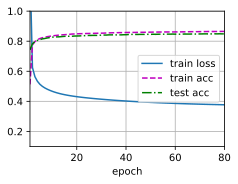

In [ ]:
#Code 16

num_epochs = 80
train_ch3(net, fashion_train_iter, fashion_test_iter, loss, num_epochs, optimizer)
mu.evaluate_accuracy(net, fashion_test_iter)